# IEG analysis

To identify which cell clusters are selectively activated by each input stimulation

#### Import libraries

In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
library(ggplot2)
library(xlsx)
library(tidyr)
library(cowplot)
library(svglite)
library(xlsx)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tidyr'


The following object is masked from 'package:magrittr':

    extract




#### Load in .rds files

In [2]:
LS.integrated<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_integrated.rds")
LS_sal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_sal.rds")
LS_mor<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_mor.rds")
LS_nal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal.rds")
LS_one_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_one_mor.rds")
LS_nal_no_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal_no_mor.rds")

#### Assign identities to cell clusters

In [3]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [4]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.integrated@assays$RNA@data[,which(Idents(object=LS.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_sal",sep=""),intersect(colnames(LS_sal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_mor",sep=""),intersect(colnames(LS_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_nal",sep=""),intersect(colnames(LS_nal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_one_mor",sep=""),intersect(colnames(LS_one_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_nal_no_mor",sep=""),intersect(colnames(LS_nal_no_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [5]:
barcode_names <- unique(paste(Idents(LS.integrated),"_barcode",sep=""))

In [6]:
celltype<-vector()
for (i in 1:dim(LS.integrated@meta.data)[1]){
    celltype[i]<-toString(new.ident[LS.integrated@meta.data$integrated_snn_res.0.2[i]])
}
LS.integrated@meta.data$celltype<-celltype

In [7]:
DefaultAssay(LS.integrated)<-'RNA'

In [8]:
LS.integrated<-NormalizeData(LS.integrated)

#### Import IEG list

In [9]:
IEG<-read.xlsx("/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only/Neurons_only_retained/optimal_resolution/IEG/IEGs.xlsx",sheetIndex=1)
IEG<-as.character(IEG[[1]])
all_genes <- unlist(LS.integrated@assays$RNA@data@Dimnames[1])
IEG <- IEG[IEG %in% all_genes]
Add_gene <- c('Fos')
IEG <- append(IEG, Add_gene)

In [10]:
length(IEG)

[1] 130

In [11]:
IEG

[1] "Fosb"     "Fosl1"    "Fosl2"    "Jun"      "Junb"     "Jund"    
  [7] "Egr1"     "Egr2"     "Egr3"     "Egr4"     "Nr4a1"    "Nr4a2"   
 [13] "Nr4a3"    "Arc"      "Homer1"   "Rheb"     "Rgs2"     "Plk2"    
 [19] "Ptgs2"    "Bdnf"     "Inhba"    "Nptx2"    "Plat"     "Nrn1"    
 [25] "Myc"      "Dusp1"    "Dusp5"    "Dusp6"    "Pcdh8"    "Cyr61"   
 [31] "Gadd45b"  "Trib1"    "Gem"      "Btg2"     "Ier2"     "Npas4"   
 [37] "Rasd1"    "Crem"     "Mbnl2"    "Arf4"     "Gadd45g"  "Arih1"   
 [43] "Nup98"    "Ppp1r15a" "Fbxo33"   "Per1"     "Per2"     "Maff"    
 [49] "Zfp36"    "Srf"      "Mcl1"     "Ctgf"     "Il6"      "Atf3"    
 [55] "Rcan1"    "Ncoa7"    "Bhlhe40"  "Slc2a3"   "Nfkbia"   "Ier3"    
 [61] "Sgk1"     "Klf6"     "Klf10"    "Nfkbiz"   "Gbp2b"    "Tnfaip3" 
 [67] "Cebpd"    "Hbegf"    "Ldlr"     "Tsc22d1"  "F3"       "Ccl2"    
 [73] "Csrnp1"   "Pmaip1"   "Zfp36l2"  "Plau"     "Ccl5"     "Saa3"    
 [79] "Tnf"      "Irf1"     "Cd83"     "Map3k8"   "Socs3"    "Il1a"    
 [85] "Il1b"     "Sod2"     "Pim1"     "Peli1"    "Tlr2"     "Ccl3"    
 [91] "Noct"     "Bcl3"     "Ifit2"    "Icam1"    "Ifit1"    "Tnfsf9"  
 [97] "Ccrl2"    "Cxcl10"   "Gbp2"     "Il10"     "Acod1"    "Mmp13"   
[103] "Il23a"    "Arhgef3"  "Serpine1" "Traf1"    "Vcam1"    "Ackr4"   
[109] "Marcksl1" "Nfkbid"   "Ikbke"    "Ccl12"    "Ifit3"    "Cebpb"   
[115] "Zfp36l1"  "Txnip"    "Nfib"     "Hes1"     "Pias1"    "Klf2"    
[121] "Dusp2"    "Wee1"     "Thbs1"    "Sik1"     "Gdf15"    "Ier5"    
[127] "Rgs1"     "Id2"      "Apold1"   "Fos"

#### IEG feature plots

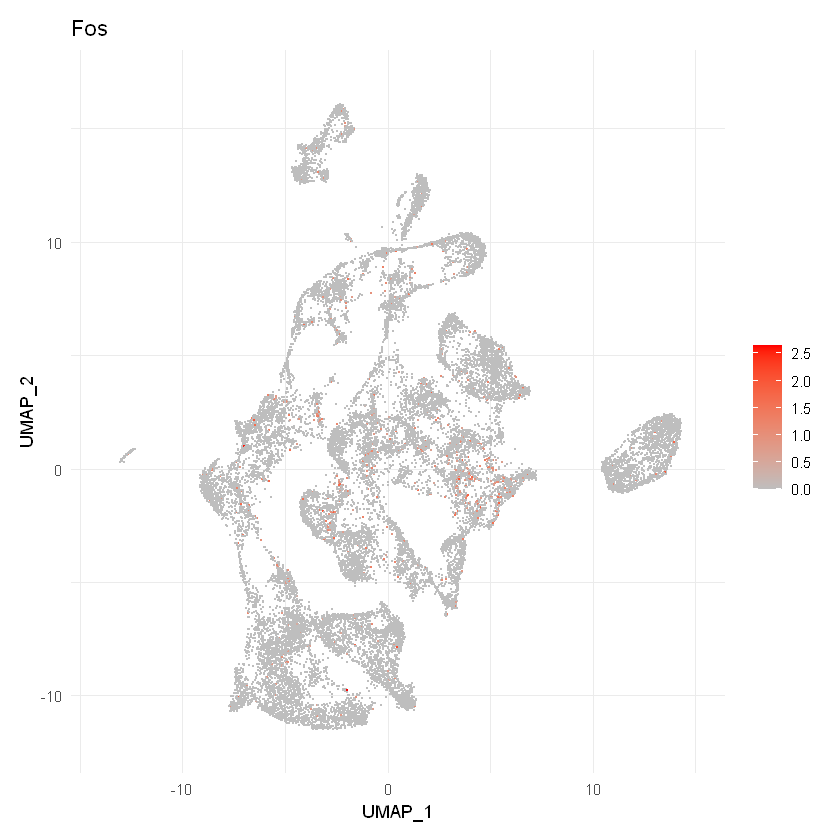

In [12]:
FeaturePlot(LS.integrated, feature='Fos', col=c('gray','red')) + theme_minimal()

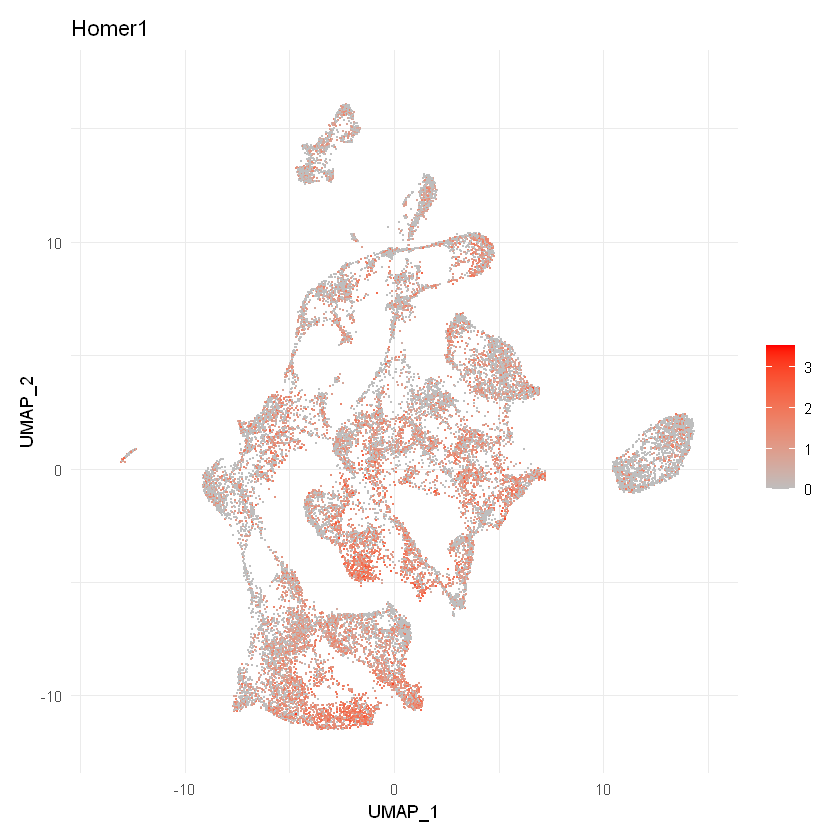

In [13]:
FeaturePlot(LS.integrated, feature='Homer1', col=c('gray','red')) + theme_minimal()

#### Grabbing dataframe of all IEGs for all cells

In [14]:
#Grabbing all expression data
assay.data<-data.frame(GetAssayData(LS.integrated, slot='data'))

In [15]:
Cell_type <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")

In [16]:
#only including cells that have any expression of a given IEG
#p value calc through wilcox, post hoc BH

log2FC <- vector()
IEG.df <- data.frame(Cell_type)
p.val <- vector()
p.val.df <- data.frame(Cell_type)

for (i in IEG){
    IEG.data <- assay.data[rownames(assay.data) %in% i,]
    
    for (c in Cell_type){
        cells.con <- intersect(colnames(LS_mor), eval(as.symbol(paste(c,'_barcode',sep=''))))
        cells.stim <- intersect(colnames(LS_nal), eval(as.symbol(paste(c,'_barcode',sep=''))))
    
        data.con <- IEG.data[colnames(IEG.data) %in% cells.con]
        data.stim <- IEG.data[colnames(IEG.data) %in% cells.stim]
        
        p <- wilcox.test(as.numeric(data.con), as.numeric(data.stim))$p.value
        p <- p.adjust(p, method='BH',n=length(Cell_type))
        p <- ifelse(p > 1, 1, p)
        p.val[c] <- p
        
        #include all cells in analysis
        mean.stim <- rowMeans(expm1(data.stim ))
        mean.con <- rowMeans(expm1(data.con ))
        
        #include only cells positive for each gene
        #mean.stim <- rowMeans(expm1(data.stim > 0))
        #mean.con <- rowMeans(expm1(data.con > 0))
        
        mean.diff <- log2(mean.stim) - log2(mean.con)
        mean.diff[is.infinite(mean.diff)]<-NA
        log2FC[c] <- mean.diff 
    
    }
    
    IEG.df <- cbind(IEG.df, data.frame(log2FC))
    log2FC <- vector()
    
    p.val.df <- cbind(p.val.df, data.frame(p.val))
    p.val <- vector()
}

Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value wit

Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value wit

In [17]:
colnames(p.val.df) <- c('Cell_type',IEG)

library(dplyr)
p.sub <- p.val.df %>% filter_all(any_vars(.<0.05)) %>% 
select_if(function(x) any(x < 0.05))
          
sub.genes <- colnames(p.sub)
sub.cells <- rownames(p.sub)
          
p.sub          

,Nr4a3,Homer1,Rheb,Inhba,Nptx2,Dusp5,Gem,Mbnl2,Ncoa7,Bhlhe40,Hbegf,Pim1,Peli1,Noct,Arhgef3,Ackr4,Nfkbid
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gaba1,0.1170470,0.4278760658,1.00000000,1.00000000,1.000000000,1.00000000,1.00000000,1.0000000000,1.000000000,1.000000000,1.0000000,0.8804686569,0.02426471,1.00000000,0.15866994,1.000000e+00,0.03618386
Gaba2,0.0394259,1.0000000000,0.95511557,0.03438933,1.000000000,1.00000000,0.05115730,1.0000000000,1.000000000,1.000000000,1.0000000,1.0000000000,0.40148811,1.00000000,1.00000000,1.000000e+00,1.00000000
Gaba4,1.0000000,1.0000000000,1.00000000,0.55204304,1.000000000,0.01031274,1.00000000,1.0000000000,1.000000000,1.000000000,1.0000000,1.0000000000,0.40687295,1.00000000,1.00000000,1.000000e+00,1.00000000
Gaba7,1.0000000,1.0000000000,1.00000000,1.00000000,1.000000000,1.00000000,1.00000000,1.0000000000,1.000000000,0.007962383,1.0000000,1.0000000000,0.55434189,1.00000000,0.04321539,1.000000e+00,1.00000000
Gaba8,1.0000000,0.0000596395,0.02038367,1.00000000,0.001727945,0.18990672,0.04603575,0.0008603571,0.002072465,1.000000000,1.0000000,0.0009926842,1.00000000,0.00270671,0.49587229,2.923911e-05,1.00000000
Glu2,1.0000000,1.0000000000,1.00000000,0.02351334,1.000000000,1.00000000,1.00000000,1.0000000000,1.000000000,1.000000000,0.0173699,1.0000000000,0.32803386,0.14156334,0.09250877,1.000000e+00,1.00000000


In [18]:
library(reshape2)
library(scales)


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [19]:
colnames(IEG.df)[2:131] <- IEG
colnames(p.val.df)[2:131] <- IEG

IEG.sub.long <- melt(cbind(IEG.df[sub.genes],Cell_type))
p.sub.long <- melt(cbind(p.val.df[sub.genes],Cell_type))

big.df <- cbind(IEG.sub.long, p.sub.long$value)
colnames(big.df) <- c("cell_type",'gene','logFC','pvalue')

big.df$highlight <- ifelse(big.df$pvalue < 0.05, '*',NA)

big.df[is.na(big.df)]<-0
big.df <- with(big.df, big.df[order(-logFC,pvalue),])
big.df

Using Cell_type as id variables

Using Cell_type as id variables



,cell_type,gene,logFC,pvalue,highlight
,<chr>,<fct>,<dbl>,<dbl>,<chr>
93,Gaba8,Gem,3.452491,0.0460357492,*
97,Gaba11,Gem,3.272678,1.0000000000,0
74,Gaba4,Dusp5,2.930410,0.0103127357,*
155,Gaba1,Pim1,2.903016,0.8804686569,0
85,Gaba1,Gem,2.847912,1.0000000000,0
163,Gaba8,Pim1,2.595290,0.0009926842,*
65,Gaba8,Nptx2,2.338045,0.0017279451,*
88,Gaba4,Gem,2.099801,1.0000000000,0
91,Gaba7,Gem,2.017333,1.0000000000,0


In [20]:
gene_list <- unique(big.df$gene)
cell_list <- unique(big.df$cell_type)

big.df$gene<-factor(big.df$gene,levels=(gene_list))
big.df$cell_type<-factor(big.df$cell_type,levels=rev(cell_list))

In [21]:
saveRDS(big.df, file='sig-IEG_dataframe.rds')
saveRDS(gene_list, file='sig-IEG_list.rds')

In [9]:
big.df <- readRDS(file='sig-IEG_dataframe.rds')
gene_list <- readRDS(file='sig-IEG_list.rds')

Warning message:
"Ignoring unknown parameters: label.size, fill"


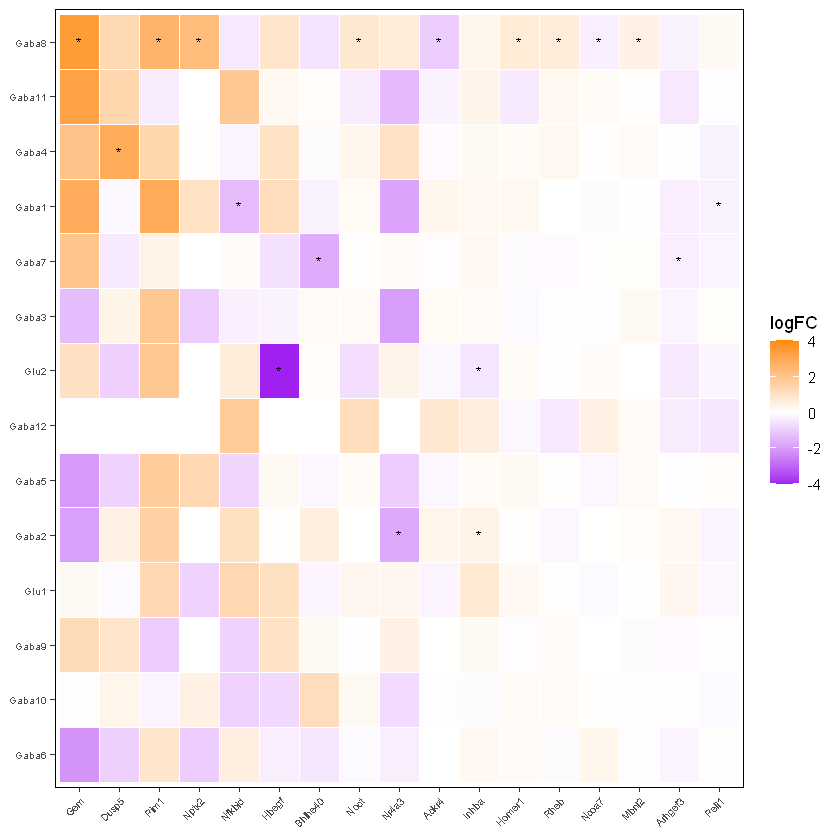

In [22]:
ggplot(big.df, aes(x=cell_type, y=gene, fill=logFC, label=highlight)) +
    geom_tile(color='white') + scale_fill_gradient2(limits=c(-4,4), breaks=seq(-4,4,by=2),low = "purple",mid='white',high = "darkorange", midpoint=0, oob=squish) +
    theme_classic() +
    theme(axis.title=element_blank(),
         axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text.y = element_text(size=6),
         axis.text.x = element_text(size=6,angle=45, hjust=1),
         axis.ticks = element_line(size=0.25)) +
    geom_text(data=subset(big.df, highlight == '*'),
        aes(cell_type,gene,label=highlight), vjust=0.5,label.size=NA, size=3, fill=NA) +
    #NoLegend() +
    coord_flip()

#### Counting the number of IEGs that are siginicantly altered

In [16]:
Gl2<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Glu2'))
Gl2

[1] 2

In [17]:
G8 <- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba8'))
G9<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba9'))
G2<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba2'))
G6<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba6'))
G1<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba1'))
G10<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba10'))
G3<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba3'))
Gl2<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Glu2'))
G7<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba7'))
Gl1<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Glu1'))
G4<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba4'))
G5<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba5'))
G11<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba11'))
G12<- length(which(big.df$highlight =='*' & big.df$cell_type == 'Gaba12'))

all <- as.numeric(c(G8, G11, G4, G1, G7, G3, Gl2, G12, G5, G2, Gl1, G9, G10, G6))

In [18]:
Cell_type<-c("Gaba8", "Gaba11", "Gaba4", "Gaba1", "Gaba7", "Gaba3", "Glu2", "Gaba12", "Gaba5", "Gaba2", "Glu1", "Gaba9", "Gaba10", "Gaba6")

In [19]:
all <- data.frame(Type = Cell_type, Number = all)

In [20]:
all$Type <- factor(all$Type, levels=Cell_type)

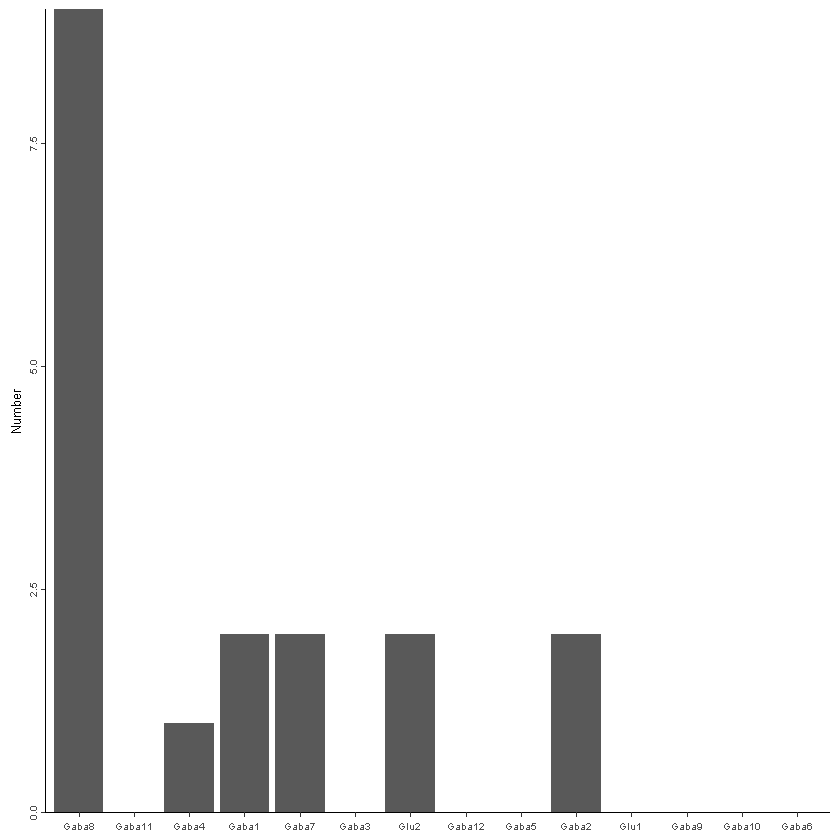

In [22]:
ggplot(all, aes(x=Type, y=Number)) + 
    geom_bar(stat='identity') +
    theme_classic() +
    theme(axis.line=element_line(size=0.25),
         axis.ticks=element_line(size=0.25),
         axis.text=element_text(size=6),
         axis.title=element_text(size=8),
         axis.title.x=element_blank(),
         axis.text.y=element_text(angle=90, hjust=.5)) +
         scale_y_continuous(expand = c(0, 0))
ggsave('IEG_count.pdf',width=1.75,height=1)

#### Calculating logFC for list of IEGs across all celltypes

In [140]:
Cell_type <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")

In [141]:
assay.data<-data.frame(GetAssayData(LS.integrated, slot='data'))
assay.data.sub <- assay.data[rownames(assay.data) %in% IEG,]
IEG.data<-data.frame(apply(assay.data.sub, FUN=mean, MARGIN=2))

In [142]:
p.test.exp <- function(cells_con, cells_stim, cells, data) {
    
    p.val<-vector()
    log2FC<-vector()
    
    for (i in cells){
    cells.con <- intersect(colnames(cells_con), eval(as.symbol(paste(i,'_barcode',sep=''))))
    cells.stim <- intersect(colnames(cells_stim), eval(as.symbol(paste(i,'_barcode',sep=''))))
    data.con <- data[rownames(IEG.data) %in% cells.con,]
    data.stim <- data[rownames(IEG.data) %in% cells.stim,]
        
    #before averaging the 'data' slot, convert from log
    mean.stim <- mean(expm1(data.stim))
    mean.con <- mean(expm1(data.con))
    #to compute the log2FC difference between stim and con
    mean.diff <- log2(mean.stim) - log2(mean.con)
    log2FC[i] <- mean.diff
    
    p <- wilcox.test(data.con, data.stim)$p.value*length(cells)
    p <- ifelse(p > 1, 1, p)
    p.val[i] <- p
    
    }
    
    return(data.frame(p.val,log2FC))
    
}

In [143]:
LS.nal <-p.test.exp(cells_con=LS_mor, cells_stim=LS_nal, cells=Cell_type, data=IEG.data)
LS.nal_sal <-p.test.exp(cells_con=LS_sal, cells_stim=LS_nal, cells=Cell_type, data=IEG.data)

LS.nal$id <- rownames(LS.nal)
LS.nal$sig <- ifelse(LS.nal$p.val < 0.05, 'red','black')

In [144]:
library(ggrepel)

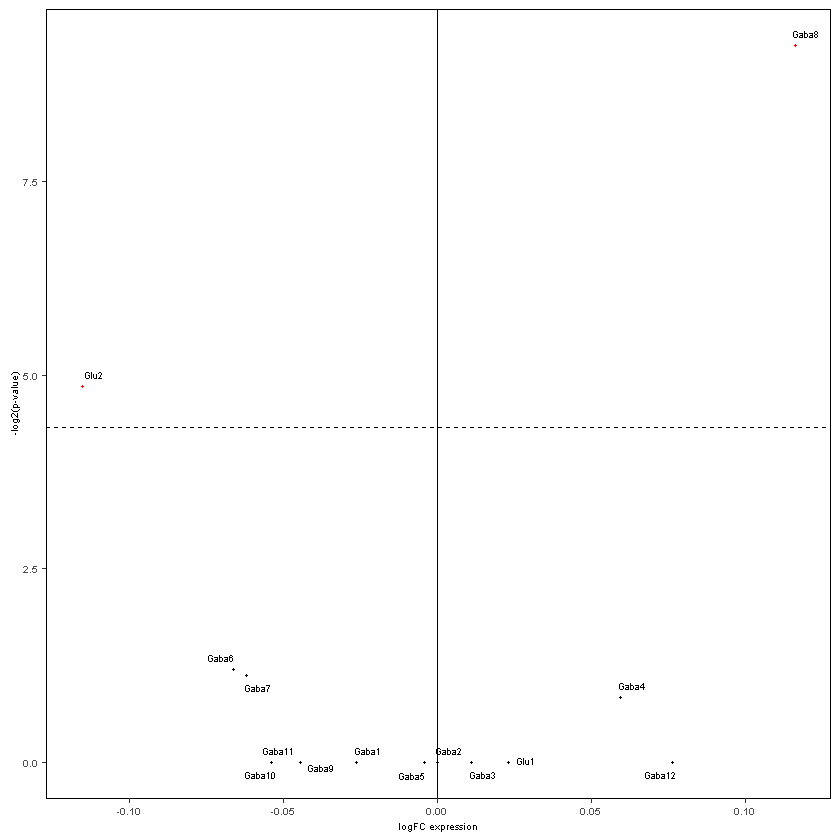

In [145]:
ggplot(LS.nal, aes(x=log2FC, y=-log2(p.val), label=id)) +
    ggtitle("NAL-induced IEGs") +
    geom_point(size=0.5, color=LS.nal$sig) + 
    scale_color_manual(values = c("TRUE" = "red", "FALSE" = "black")) +
    geom_text_repel(size=2) +
    theme_classic() + 
    theme(axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text = element_text(size=6),
         axis.title = element_text(size=6),
         axis.ticks = element_line(size=0.25)) +
    xlab("logFC expression") + 
    ylab("-log2(p-value)") +
    geom_vline(xintercept=0, size=0.25) +
    geom_hline(yintercept=-log2(0.05), linetype='dashed', size=0.25) +
ylim(c(0,NA))

Now plotting "classic" IEGs as a side-by-side comparison

In [146]:
classic.sub <- melt(IEG.df[c('Cell_type','Fos','Fosb','Egr1','Egr3','Arc','Jun','Junb','Jund','Nr4a1')])

Using Cell_type as id variables



In [147]:
colnames(classic.sub) <- c('Cell_type',"gene","logFC")

In [148]:
classic.sub$Cell_type<-factor(classic.sub$Cell_type,levels=rev(cell_list))

In [149]:
classic.sub[is.na(classic.sub)]<-0

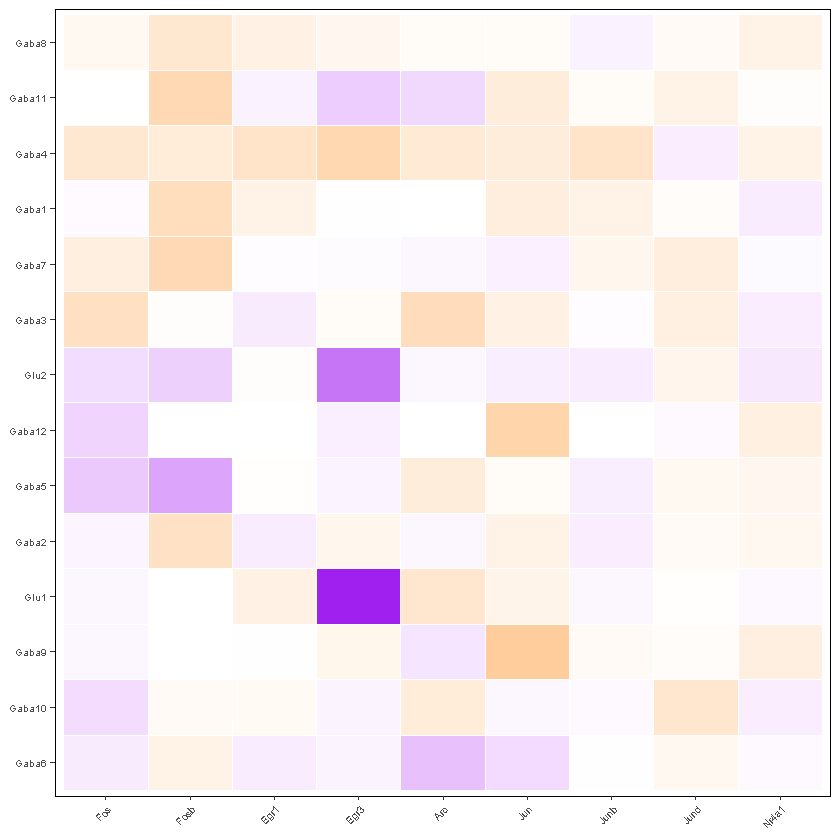

In [150]:
ggplot(classic.sub, aes(x=Cell_type, y=gene, fill=logFC)) +
    geom_tile(color='white') + scale_fill_gradient2(limits=c(-4,4), breaks=seq(-4,4,by=2),low = "purple",mid='white',high = "darkorange", midpoint=0, oob=squish) +
    theme_classic() +
    theme(axis.title=element_blank(),
         axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text.y = element_text(size=6),
         axis.text.x = element_text(size=6,angle=45, hjust=1),
         axis.ticks = element_line(size=0.25)) +
    NoLegend() +
    coord_flip()
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/IEG/mor_v_nal/IEG_heatmap_classic.pdf",width=1.5,height=1.75)

Plotting combined IEG score

In [151]:
Cell_type <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
gene_list <- c('Cell_type','Fos','Fosb','Egr1','Egr3','Arc','Jun','Junb','Jund','Nr4a1')
IEG <- gene_list

In [152]:
assay.data<-data.frame(GetAssayData(LS.integrated, slot='data'))
assay.data.sub <- assay.data[rownames(assay.data) %in% IEG,]
IEG.data<-data.frame(apply(assay.data.sub, FUN=mean, MARGIN=2))

In [153]:
p.test.exp <- function(cells_con, cells_stim, cells, data) {
    
    p.val<-vector()
    log2FC<-vector()
    
    for (i in cells){
    cells.con <- intersect(colnames(cells_con), eval(as.symbol(paste(i,'_barcode',sep=''))))
    cells.stim <- intersect(colnames(cells_stim), eval(as.symbol(paste(i,'_barcode',sep=''))))
    data.con <- data[rownames(IEG.data) %in% cells.con,]
    data.stim <- data[rownames(IEG.data) %in% cells.stim,]
        
    #before averaging the 'data' slot, convert from log to cartesian expression
    mean.stim <- mean(expm1(data.stim))
    mean.con <- mean(expm1(data.con))
    #to compute the log2FC difference between stim and con
    mean.diff <- log2(mean.stim) - log2(mean.con)
    log2FC[i] <- mean.diff

    p <- wilcox.test(data.con, data.stim)$p.value*length(cells)
    p <- ifelse(p > 1, 1, p)
    p.val[i] <- p
    
    }
    
    return(data.frame(p.val,log2FC))
    
}

In [154]:
LS.nal <-p.test.exp(cells_con=LS_mor, cells_stim=LS_nal, cells=Cell_type, data=IEG.data)
LS.nal$id <- rownames(LS.nal)
LS.nal$sig <- ifelse(LS.nal$p.val < 0.05, 'red','black')

Warning message in wilcox.test.default(data.con, data.stim):
"cannot compute exact p-value with ties"


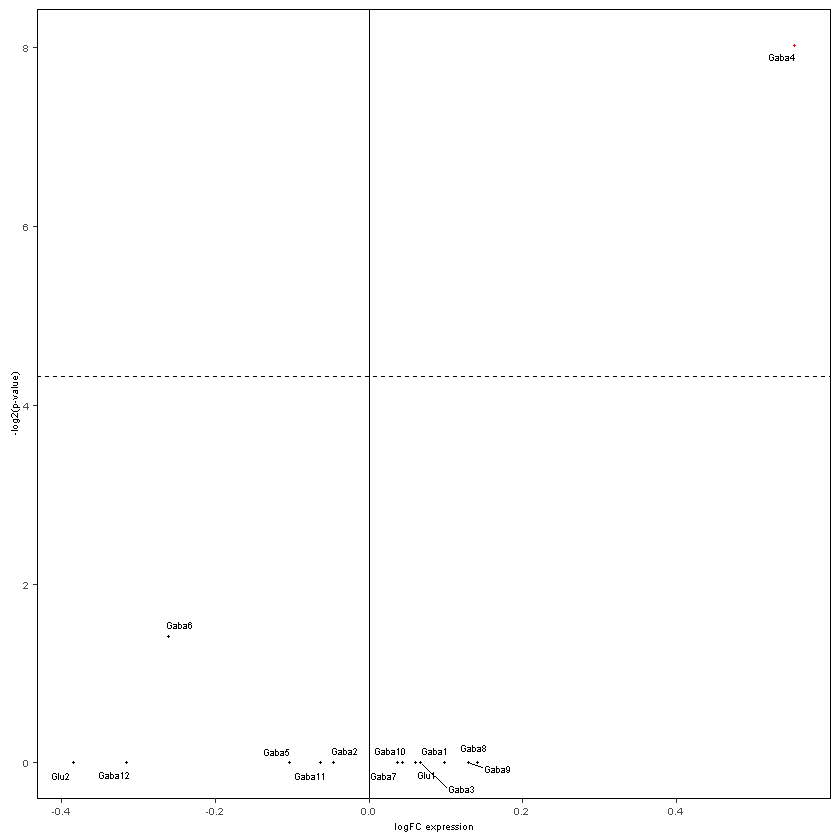

In [155]:
ggplot(LS.nal, aes(x=log2FC, y=-log2(p.val), label=id)) +
    ggtitle("NAL-induced IEGs") +
    geom_point(size=0.5, color=LS.nal$sig) + 
    scale_color_manual(values = c("TRUE" = "red", "FALSE" = "black")) +
    geom_text_repel(size=2) +
    theme_classic() + 
    theme(axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text = element_text(size=6),
         axis.title = element_text(size=6),
         axis.ticks = element_line(size=0.25)) +
    xlab("logFC expression") + 
    ylab("-log2(p-value)") +
    geom_vline(xintercept=0, size=0.25) +
    geom_hline(yintercept=-log2(0.05), linetype='dashed', size=0.25) +
ylim(c(0,NA))